In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Proportion of Comments with Emojis for श्री हनुमान चालीसा 🌺🙏 Shree Hanuman Chalisa Original Video 🙏🌺 GULSHAN KUMAR  HARIHARAN Full HD.csv", on_bad_lines='skip', encoding='utf-8', engine='python')

In [4]:
df

,row_number,original_comment,translated_comment
0,4,Please pray my dad . He is no more. 🙏,Please pray my dad He is no more 🙏
1,9,🙏🙏,🙏🙏
2,11,Jay shree Ram 🙏🙏🙏🙏🙏🌹🌹🌹🌹🌹🌹🌺🌺🌺🌺🌺🚩🚩🚩🚩🚩🚩,Jay shree Ram 🙏🙏🙏🙏🙏🌹🌹🌹🌹🌹🌹🌺🌺🌺🌺🌺🚩🚩🚩🚩🚩🚩
3,13,Joy joy Hanuman 🍫❤️❤️🙏🍫🍫🌹❤️❤️🙏🙏🙏🙏,Joy joy Hanuman 🍫🙏🍫🍫🌹🙏🙏🙏🙏
4,15,Jay HANUMAN🙏🙏,Jay HANUMAN 🙏🙏
...,...,...,...
27379,Jai Shree Ram g,None,None
27380,Jai Hanuman g,None,None
27381,49995,Jai shree 🙏Ram. Jai Hanuman ji,Jai Shree Ram Jai Hanuman ji 🙏
27382,49997,❤❤❤❤❤❤❤❤❤❤😊❤😊❤😊😊😊❤😊❤😊❤😊😊❤❤,❤❤❤❤❤❤❤❤❤❤😊❤😊❤😊😊😊❤😊❤😊❤😊😊❤❤


In [5]:
mapping=pd.read_csv("Mapping2.csv")

In [6]:
mapping

,Unnamed: 0,emoji,label
0,0,❤,0
1,1,🇧,1
2,2,🇮,2
3,3,🎉,3
4,4,🎧,4
5,5,🎵,5
6,6,🎶,6
7,7,👀,7
8,8,👇,8
9,9,👌,9


In [7]:
import re
def remove_emojis_and_check(comment):
    # Ensure the comment is a string (handle NaN, None, or non-string values)
    if not isinstance(comment, str):
        return None
    
    # Remove any emoji using a general emoji pattern
    # This regex matches all emojis
    emoji_pattern = re.compile(r'[\U0001F600-\U0001F64F'  # Emoticons
                               r'\U0001F300-\U0001F5FF'  # Symbols & Pictographs
                               r'\U0001F680-\U0001F6FF'  # Transport & Map Symbols
                               r'\U0001F700-\U0001F77F'  # Alchemical Symbols
                               r'\U0001F780-\U0001F7FF'  # Geometric Shapes Extended
                               r'\U0001F800-\U0001F8FF'  # Supplemental Arrows-C
                               r'\U0001F900-\U0001F9FF'  # Supplemental Symbols and Pictographs
                               r'\U0001FA00-\U0001FA6F'  # Chess Symbols
                               r'\U0001FA70-\U0001FAFF'  # Symbols and Pictographs Extended-A
                               r'\U00002702-\U000027B0'  # Miscellaneous Symbols
                               r'\U000024C2-\U0001F251'  # Enclosed characters
                               r']', flags=re.UNICODE)

    # Remove emojis from the comment
    cleaned_comment = re.sub(emoji_pattern, '', comment)

    # If the cleaned comment is empty or just spaces, return None to drop the row
    if not cleaned_comment.strip():
        return None
    
    return cleaned_comment

In [8]:
df['translated_comment'] = df['translated_comment'].apply(remove_emojis_and_check)

In [9]:
df

,row_number,original_comment,translated_comment
0,4,Please pray my dad . He is no more. 🙏,Please pray my dad He is no more
1,9,🙏🙏,None
2,11,Jay shree Ram 🙏🙏🙏🙏🙏🌹🌹🌹🌹🌹🌹🌺🌺🌺🌺🌺🚩🚩🚩🚩🚩🚩,Jay shree Ram
3,13,Joy joy Hanuman 🍫❤️❤️🙏🍫🍫🌹❤️❤️🙏🙏🙏🙏,Joy joy Hanuman
4,15,Jay HANUMAN🙏🙏,Jay HANUMAN
...,...,...,...
27379,Jai Shree Ram g,None,None
27380,Jai Hanuman g,None,None
27381,49995,Jai shree 🙏Ram. Jai Hanuman ji,Jai Shree Ram Jai Hanuman ji
27382,49997,❤❤❤❤❤❤❤❤❤❤😊❤😊❤😊😊😊❤😊❤😊❤😊😊❤❤,None


In [10]:
df = df.dropna(subset=['translated_comment'])
df

,row_number,original_comment,translated_comment
0,4,Please pray my dad . He is no more. 🙏,Please pray my dad He is no more
2,11,Jay shree Ram 🙏🙏🙏🙏🙏🌹🌹🌹🌹🌹🌹🌺🌺🌺🌺🌺🚩🚩🚩🚩🚩🚩,Jay shree Ram
3,13,Joy joy Hanuman 🍫❤️❤️🙏🍫🍫🌹❤️❤️🙏🙏🙏🙏,Joy joy Hanuman
4,15,Jay HANUMAN🙏🙏,Jay HANUMAN
5,16,11:40 pe kon kon sun Raha hai ❤❤,1140 pe kon kon sun Raha hai
...,...,...,...
27370,49990,Jai shree ram ❤❤❤❤,Jai shree ram
27371,49991,Jai shree ram ji 🙏 jai bjarang bli ji 🙏,Hail Shree Ram ji Hail Bajrangbli ji
27375,49993,ॐ श्री हनुमते नमः 🙏🙏🙏🙏🙏,Om Shar Hanmat Namah
27381,49995,Jai shree 🙏Ram. Jai Hanuman ji,Jai Shree Ram Jai Hanuman ji


In [11]:
import string
def tweet_clean(tweet):
    tweet = str(tweet).lower()
    # remove @mentions
    rm_mention = re.sub(r'@[A-Za-z0-9]+', '', tweet) 
    
    # remove RT
    rm_rt = re.sub(r'RT[/s]+', '', rm_mention) 
    
    # remove hyperlinks
    rm_links = re.sub(r'http\S+', '', rm_rt)                               
    rm_links = re.sub(r'https?:\/\/\S+','', rm_links)
    
    # remove numbers
    rm_nums = re.sub('[0-9]+', '', rm_links)         
    
    # remove punctuations
    rm_punc = [char for char in rm_nums if char not in string.punctuation] # remove punctuations
    rm_punc = ''.join(rm_punc)
    cleaned = rm_punc
    
    return cleaned

In [12]:
df["translated_comment"] = df["translated_comment"].apply(tweet_clean)
df

,row_number,original_comment,translated_comment
0,4,Please pray my dad . He is no more. 🙏,please pray my dad he is no more
2,11,Jay shree Ram 🙏🙏🙏🙏🙏🌹🌹🌹🌹🌹🌹🌺🌺🌺🌺🌺🚩🚩🚩🚩🚩🚩,jay shree ram
3,13,Joy joy Hanuman 🍫❤️❤️🙏🍫🍫🌹❤️❤️🙏🙏🙏🙏,joy joy hanuman
4,15,Jay HANUMAN🙏🙏,jay hanuman
5,16,11:40 pe kon kon sun Raha hai ❤❤,pe kon kon sun raha hai
...,...,...,...
27370,49990,Jai shree ram ❤❤❤❤,jai shree ram
27371,49991,Jai shree ram ji 🙏 jai bjarang bli ji 🙏,hail shree ram ji hail bajrangbli ji
27375,49993,ॐ श्री हनुमते नमः 🙏🙏🙏🙏🙏,om shar hanmat namah
27381,49995,Jai shree 🙏Ram. Jai Hanuman ji,jai shree ram jai hanuman ji


In [13]:
df = df.dropna(subset=['translated_comment'])
df

,row_number,original_comment,translated_comment
0,4,Please pray my dad . He is no more. 🙏,please pray my dad he is no more
2,11,Jay shree Ram 🙏🙏🙏🙏🙏🌹🌹🌹🌹🌹🌹🌺🌺🌺🌺🌺🚩🚩🚩🚩🚩🚩,jay shree ram
3,13,Joy joy Hanuman 🍫❤️❤️🙏🍫🍫🌹❤️❤️🙏🙏🙏🙏,joy joy hanuman
4,15,Jay HANUMAN🙏🙏,jay hanuman
5,16,11:40 pe kon kon sun Raha hai ❤❤,pe kon kon sun raha hai
...,...,...,...
27370,49990,Jai shree ram ❤❤❤❤,jai shree ram
27371,49991,Jai shree ram ji 🙏 jai bjarang bli ji 🙏,hail shree ram ji hail bajrangbli ji
27375,49993,ॐ श्री हनुमते नमः 🙏🙏🙏🙏🙏,om shar hanmat namah
27381,49995,Jai shree 🙏Ram. Jai Hanuman ji,jai shree ram jai hanuman ji


In [14]:
df=df[df['translated_comment']!='']
df

,row_number,original_comment,translated_comment
0,4,Please pray my dad . He is no more. 🙏,please pray my dad he is no more
2,11,Jay shree Ram 🙏🙏🙏🙏🙏🌹🌹🌹🌹🌹🌹🌺🌺🌺🌺🌺🚩🚩🚩🚩🚩🚩,jay shree ram
3,13,Joy joy Hanuman 🍫❤️❤️🙏🍫🍫🌹❤️❤️🙏🙏🙏🙏,joy joy hanuman
4,15,Jay HANUMAN🙏🙏,jay hanuman
5,16,11:40 pe kon kon sun Raha hai ❤❤,pe kon kon sun raha hai
...,...,...,...
27370,49990,Jai shree ram ❤❤❤❤,jai shree ram
27371,49991,Jai shree ram ji 🙏 jai bjarang bli ji 🙏,hail shree ram ji hail bajrangbli ji
27375,49993,ॐ श्री हनुमते नमः 🙏🙏🙏🙏🙏,om shar hanmat namah
27381,49995,Jai shree 🙏Ram. Jai Hanuman ji,jai shree ram jai hanuman ji


In [15]:
df=df[df['translated_comment']!=' ']
df

,row_number,original_comment,translated_comment
0,4,Please pray my dad . He is no more. 🙏,please pray my dad he is no more
2,11,Jay shree Ram 🙏🙏🙏🙏🙏🌹🌹🌹🌹🌹🌹🌺🌺🌺🌺🌺🚩🚩🚩🚩🚩🚩,jay shree ram
3,13,Joy joy Hanuman 🍫❤️❤️🙏🍫🍫🌹❤️❤️🙏🙏🙏🙏,joy joy hanuman
4,15,Jay HANUMAN🙏🙏,jay hanuman
5,16,11:40 pe kon kon sun Raha hai ❤❤,pe kon kon sun raha hai
...,...,...,...
27370,49990,Jai shree ram ❤❤❤❤,jai shree ram
27371,49991,Jai shree ram ji 🙏 jai bjarang bli ji 🙏,hail shree ram ji hail bajrangbli ji
27375,49993,ॐ श्री हनुमते नमः 🙏🙏🙏🙏🙏,om shar hanmat namah
27381,49995,Jai shree 🙏Ram. Jai Hanuman ji,jai shree ram jai hanuman ji


In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

def remove_stopwords(tweet):
    # Tokenize the tweet into words
    words = word_tokenize(tweet)

    # Get the English stopwords
    stop_words = set(stopwords.words('english'))

    # Remove stopwords from the tweet
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a string
    filtered_tweet = ' '.join(filtered_words)

    return filtered_tweet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
df["translated_comment"] = df["translated_comment"].apply(remove_stopwords)
df

,row_number,original_comment,translated_comment
0,4,Please pray my dad . He is no more. 🙏,please pray dad
2,11,Jay shree Ram 🙏🙏🙏🙏🙏🌹🌹🌹🌹🌹🌹🌺🌺🌺🌺🌺🚩🚩🚩🚩🚩🚩,jay shree ram
3,13,Joy joy Hanuman 🍫❤️❤️🙏🍫🍫🌹❤️❤️🙏🙏🙏🙏,joy joy hanuman
4,15,Jay HANUMAN🙏🙏,jay hanuman
5,16,11:40 pe kon kon sun Raha hai ❤❤,pe kon kon sun raha hai
...,...,...,...
27370,49990,Jai shree ram ❤❤❤❤,jai shree ram
27371,49991,Jai shree ram ji 🙏 jai bjarang bli ji 🙏,hail shree ram ji hail bajrangbli ji
27375,49993,ॐ श्री हनुमते नमः 🙏🙏🙏🙏🙏,om shar hanmat namah
27381,49995,Jai shree 🙏Ram. Jai Hanuman ji,jai shree ram jai hanuman ji


In [18]:
X = df["translated_comment"].values

In [19]:
X = X.reshape(-1,)
X.shape

(19215,)

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=80000)
tokenizer.fit_on_texts(X)

In [21]:
print("Text \n",X[:10],'\n')

X_seqs = tokenizer.texts_to_sequences(X)
print("Sequences")
X_seqs[:10]

Text 
 ['please pray dad' 'jay shree ram' 'joy joy hanuman' 'jay hanuman'
 'pe kon kon sun raha hai' 'jai shree ram' 'jai shree ram' 'jai shree ram'
 'jai shree ram' 'victory hanuman'] 

Sequences


[[23, 405, 175],
 [4, 3, 1],
 [39, 39, 5],
 [4, 5],
 [441, 36, 36, 18, 61, 46],
 [2, 3, 1],
 [2, 3, 1],
 [2, 3, 1],
 [2, 3, 1],
 [66, 5]]

In [22]:
idx2words = tokenizer.index_word

print("Word Mappings\n")
for i in range(100,110):
    print("Index: ",i, "---->",idx2words[i])

Word Mappings

Index:  100 ----> video
Index:  101 ----> cut
Index:  102 ----> bhajan
Index:  103 ----> जी
Index:  104 ----> veer
Index:  105 ----> ha
Index:  106 ----> laxman
Index:  107 ----> many
Index:  108 ----> save
Index:  109 ----> one


In [23]:
vocab_size = len(tokenizer.index_word)
print("Vocabulary size :",len(tokenizer.index_word))

Vocabulary size : 3619


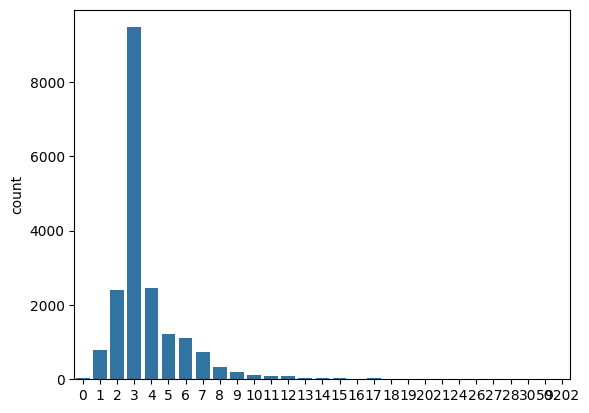

In [24]:
lens = [len(seq) for seq in X_seqs]
sns.countplot(x=lens)
plt.show()

In [25]:
from tensorflow.keras.utils import pad_sequences

max_len=40
X_seqs_pd = pad_sequences(X_seqs, truncating="pre", padding="pre", maxlen=max_len)

In [26]:
print("Before Padding")
print(X_seqs[:1])

print("\nAfter Padding")
print(X_seqs_pd[:1])

Before Padding
[[23, 405, 175]]

After Padding
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  23 405 175]]


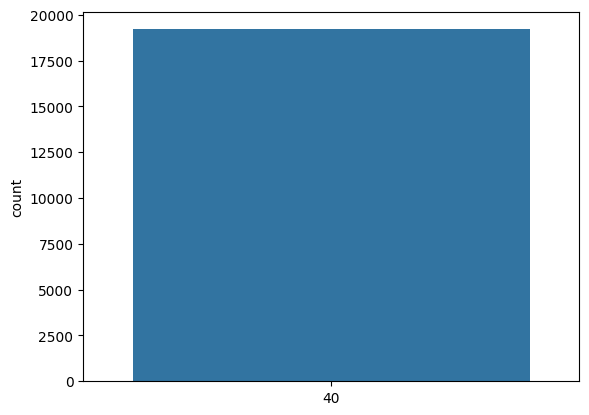

In [27]:
lens = [len(seq) for seq in X_seqs_pd]
sns.countplot(x=lens)
plt.show()

In [28]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [29]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D



vocabulary_size = 21613  # Match the saved model's vocabulary size
seq_len = 40
embed_len = 128

# Rebuild the model architecture
model = Sequential()
model.add(Embedding(vocabulary_size, embed_len, input_length=seq_len))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(40, activation="softmax"))

# Build the model
model.build(input_shape=(None, seq_len))  # None for batch size

# Load weights
model.load_weights('BTP_eval.weights.h5')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 40, 128)             │       2,766,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 40, 200)             │         183,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 40, 200)             │         240,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 200)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          25,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 40)                  │           5,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,221,352 (12.29 MB)

 Trainable params: 3,221,352 (12.29 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
def sequences_to_text(sequences, tokenizer):
    return [' '.join([tokenizer.index_word.get(i, '') for i in seq if i != 0]) for seq in sequences]

# Assuming 'model' is your trained model and 'y_pred' contains the predicted class indices
# 1. Rebuild the original comments from tokenized sequences
reconstructed_comments = sequences_to_text(X_seqs_pd, tokenizer)

# 2. Get the predicted labels (e.g., if model output is class indices)
y_pred = model.predict(X_seqs_pd)
y_pred_class = np.argmax(y_pred, axis=1)  # Use this if model output is probabilities

# 3. Create a DataFrame
result_df = pd.DataFrame({
    'translated_comment': reconstructed_comments,
    'predicted_label': y_pred_class
})

601/601 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step


In [31]:
result_df

,translated_comment,predicted_label
0,please pray dad,23
1,jay shree ram,23
2,joy joy hanuman,10
3,jay hanuman,15
4,pe kon kon sun raha hai,15
...,...,...
19210,jai shree ram,23
19211,hail shree ram ji hail bajrangbli ji,28
19212,om shar hanmat namah,35
19213,jai shree ram jai hanuman ji,15


In [32]:
number_to_emoji = dict(zip(mapping['label'], mapping['emoji']))

# Assuming 'result_df' is your DataFrame with 'actual_label' and 'predicted_label' columns containing label numbers
result_df['predicted_label_emoji'] = result_df['predicted_label'].map(number_to_emoji)

# Display the updated DataFrame
compare_df=result_df[['translated_comment', 'predicted_label_emoji']]
compare_df

,translated_comment,predicted_label_emoji
0,please pray dad,😅
1,jay shree ram,😅
2,joy joy hanuman,👍
3,jay hanuman,💖
4,pe kon kon sun raha hai,💖
...,...,...
19210,jai shree ram,😅
19211,hail shree ram ji hail bajrangbli ji,😔
19212,om shar hanmat namah,🙏
19213,jai shree ram jai hanuman ji,💖


In [33]:
import numpy as np
from textblob import TextBlob

# Step 1: Assign sentiment values to emojis
emoji_sentiment = {
    "❤": 90, "🇧": 50, "🇮": 50, "🎉": 85, "🎧": 70, "🎵": 75,
    "🎶": 75, "👀": 50, "👇": 30, "👌": 80, "👍": 85, "👏": 88,
    "💀": 20, "💔": 10, "💕": 95, "💖": 95, "💯": 100, "🔥": 80,
    "🕊": 90, "🗿": 40, "😀": 95, "😁": 90, "😂": 85, "😅": 75,
    "😊": 80, "😌": 70, "😍": 95, "😎": 80, "😔": 40, "😘": 85,
    "😢": 30, "😭": 20, "😮": 50, "😳": 45, "🙂": 75, "🙏": 85,
    "🚩": 30, "🤣": 80, "🥰": 90, "🥺": 40
}

In [34]:
def text_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    scaled_sentiment = (polarity + 1) * 50  
    return scaled_sentiment

In [35]:
def calculate_rms(text_sentiment, emoji_sentiment):
    return np.sqrt((text_sentiment ** 2 + emoji_sentiment ** 2) / 2)

In [36]:
def process_row(row):
    text_sent_val = text_sentiment(row['translated_comment'])  # Get sentiment for text
    emoji_sent_val = emoji_sentiment.get(row['predicted_label_emoji'], None)  # Get sentiment for emoji
    if emoji_sent_val is not None:
        rms_value = calculate_rms(text_sent_val, emoji_sent_val)  # Calculate RMS
        return text_sent_val, emoji_sent_val, rms_value
    else:
        return text_sent_val, 0, 0  

In [37]:
compare_df[['text_sentiment', 'emoji_sentiment', 'rms']] = compare_df.apply(process_row, axis=1, result_type='expand')
compare_df

,translated_comment,predicted_label_emoji,text_sentiment,emoji_sentiment,rms
0,please pray dad,😅,50.0,75.0,63.737744
1,jay shree ram,😅,50.0,75.0,63.737744
2,joy joy hanuman,👍,90.0,85.0,87.535707
3,jay hanuman,💖,50.0,95.0,75.911132
4,pe kon kon sun raha hai,💖,50.0,95.0,75.911132
...,...,...,...,...,...
19210,jai shree ram,😅,50.0,75.0,63.737744
19211,hail shree ram ji hail bajrangbli ji,😔,50.0,40.0,45.276926
19212,om shar hanmat namah,🙏,50.0,85.0,69.731628
19213,jai shree ram jai hanuman ji,💖,50.0,95.0,75.911132


In [38]:
def calculate_rms_for_dataframe(df):
    squared_differences = []
    for index, row in df.iterrows():
        text_sent_val = text_sentiment(row['translated_comment'])  # Get sentiment for text
        emoji_sent_val = emoji_sentiment.get(row['predicted_label_emoji'], None)  # Get sentiment for emoji
        if emoji_sent_val is not None:
            rms_value = np.sqrt((text_sent_val ** 2 + emoji_sent_val ** 2) / 2)
            squared_differences.append(rms_value)
    
    # Calculate RMS
    rms = np.mean(squared_differences)
    return rms

In [39]:
overall_rms = calculate_rms_for_dataframe(compare_df)
overall_rms

63.44649815001488

In [40]:
rmse_df = pd.DataFrame({'Video Title': ['श्री हनुमान चालीसा 🌺🙏 Shree Hanuman Chalisa Original Video 🙏🌺 GULSHAN KUMAR  HARIHARAN Full HD'],
                        'RMSE': [overall_rms]})
rmse_df

,Video Title,RMSE
0,श्री हनुमान चालीसा 🌺🙏 Shree Hanuman Chalisa Or...,63.446498


In [41]:
import os

# Check if the CSV file exists
csv_filename = 'sentiment_results.csv'

# If the CSV file exists, append the new RMSE value, otherwise create a new CSV
if os.path.exists(csv_filename):
    # Append the RMSE to the existing CSV
    rmse_df.to_csv(csv_filename, mode='a', header=False, index=False)
else:
    # Create a new CSV file and write the header along with the RMSE
    rmse_df.to_csv(csv_filename, mode='w', header=True, index=False)

print(f"RMSE values have been saved to {csv_filename}")

RMSE values have been saved to sentiment_results.csv
